## Recurrent Neural Network - Long Short Term Memory

Stockhold dataset: [br.financas.yahoo.com/quote/PTR4.SA](https://br.financas.yahoo.com/quote/PBR/history/)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib 
import tensorflow as tf
import sklearn

In [4]:
np.__version__, pd.__version__, matplotlib.__version__,tf.__version__, sklearn.__version__

('1.26.4', '2.2.2', '3.9.2', '2.17.0', '1.5.1')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../data/petr/petr4_treinamento.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [7]:
data.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
train_data = data.iloc[:, 1:2].values
train_data

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [11]:
normalizer = MinMaxScaler(feature_range=(0, 1))
normalized_train_data = normalizer.fit_transform(train_data)
normalized_train_data

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [12]:
# dataset: the previous ninety prices will be our predictors 

X = [] # predictors
y = [] # real stockhold prices

for i in range(90, 1242): # the previous ninety prices
    X.append(normalized_train_data[i-90:i, 0])
    y.append(normalized_train_data[i, 0])


In [13]:
X, y = np.array(X), np.array(y)

In [14]:
X.shape, y.shape

((1152, 90), (1152,))

In [15]:
regressor = Sequential()

regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
regressor.add(Dropout(0.3)) # to prevent overfitting

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50)) # since it is the last layer we shouldn't self send data to the neurons
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1, activation='linear'))


regressor.summary()

c:\Users\Matheus\Documents\GitHub\ai-experiments\ai-exp\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [17]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0700 - mean_absolute_error: 0.1901
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0149 - mean_absolute_error: 0.0932
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0166 - mean_absolute_error: 0.0985
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0133 - mean_absolute_error: 0.0877
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0110 - mean_absolute_error: 0.0810
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0114 - mean_absolute_error: 0.0815
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0080 - mean_absolute_error: 0.0710
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0091 - mean_absolute_error: 0.0723
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0087 - mean_absolute_error: 0.0710
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0064 - mean_absolute_error: 0.0599
Epoch 11/100
36/36 ━━━━━━━━━━

In [18]:
test_data = pd.read_csv('../data/petr/petr4_teste.csv')
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [19]:
test_data.shape

(22, 7)

In [20]:
y_test = test_data.iloc[:, 1:2].values
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [21]:
data['Open'].shape

(1242,)

In [22]:
complete_data = pd.concat((data['Open'], test_data['Open']), axis=0)
complete_data.shape

(1264,)

In [23]:
complete_data

0     19.990000
1     19.809999
2     20.330000
3     20.480000
4     20.110001
        ...    
17    19.340000
18    19.620001
19    19.670000
20    19.770000
21    19.740000
Name: Open, Length: 1264, dtype: float64

In [24]:
# we have index
len(complete_data) - len(test_data) - 90

1152

In [25]:
# the complete dataset records minus the 22 test dataset records minus the 90
inputs = complete_data[len(complete_data) - len(test_data) - 90:].values
inputs

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [26]:
inputs.shape

(112,)

In [27]:
type(inputs)

numpy.ndarray

In [28]:

inputs = inputs.reshape(-1, 1)
inputs.shape, inputs


((112, 1),
 array([[13.93    ],
        [13.76    ],
        [13.79    ],
        [13.53    ],
        [13.85    ],
        [13.96    ],
        [14.57    ],
        [14.65    ],
        [15.02    ],
        [15.1     ],
        [14.88    ],
        [14.98    ],
        [14.94    ],
        [15.03    ],
        [15.07    ],
        [15.02    ],
        [15.1     ],
        [15.25    ],
        [15.85    ],
        [15.6     ],
        [15.79    ],
        [15.86    ],
        [15.7     ],
        [15.37    ],
        [15.5     ],
        [15.19    ],
        [15.6     ],
        [15.9     ],
        [15.88    ],
        [15.66    ],
        [15.61    ],
        [16.129999],
        [16.17    ],
        [16.08    ],
        [16.23    ],
        [16.16    ],
        [16.139999],
        [16.219999],
        [16.      ],
        [16.190001],
        [16.290001],
        [16.290001],
        [16.530001],
        [16.780001],
        [16.77    ],
        [16.969999],
        [16.9     ],
  

In [29]:
inputs = normalizer.transform(inputs)
inputs

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [30]:
X_test = []
for i in range(90, 112):
    X_test.append(inputs[i-90:i, 0])
X_test

[array([0.47141473, 0.46317829, 0.46463178, 0.45203488, 0.46753876,
        0.47286822, 0.50242248, 0.50629845, 0.52422481, 0.52810078,
        0.51744186, 0.52228682, 0.52034884, 0.5247093 , 0.52664729,
        0.52422481, 0.52810078, 0.53536822, 0.56443798, 0.55232558,
        0.56153101, 0.56492248, 0.55717054, 0.54118217, 0.54748062,
        0.53246124, 0.55232558, 0.56686047, 0.56589147, 0.55523256,
        0.55281008, 0.57800383, 0.57994186, 0.5755814 , 0.58284884,
        0.57945736, 0.57848832, 0.58236429, 0.57170543, 0.5809109 ,
        0.58575586, 0.58575586, 0.59738377, 0.60949617, 0.60901163,
        0.6187015 , 0.61531008, 0.61967054, 0.61531008, 0.61821701,
        0.62257747, 0.63517437, 0.60513571, 0.61482553, 0.6061046 ,
        0.60513571, 0.60271313, 0.54021318, 0.55329457, 0.56782946,
        0.57267442, 0.57897287, 0.57606589, 0.57073643, 0.58381783,
        0.57218992, 0.56831395, 0.56540698, 0.5377907 , 0.53972868,
        0.55474806, 0.54748062, 0.53391473, 0.53

In [31]:
X_test = np.array(X_test)
X_test.shape

(22, 90)

In [32]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(22, 90, 1)

In [43]:
predictions = regressor.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.56870925],
       [0.57254493],
       [0.5766815 ],
       [0.5829297 ],
       [0.58978033],
       [0.5955826 ],
       [0.60112846],
       [0.6055057 ],
       [0.60783416],
       [0.6091806 ],
       [0.6118984 ],
       [0.61619276],
       [0.6243563 ],
       [0.6375087 ],
       [0.6521852 ],
       [0.6640965 ],
       [0.67195594],
       [0.67595166],
       [0.68259287],
       [0.6942595 ],
       [0.70833707],
       [0.7214414 ]], dtype=float32)

In [44]:
predictions = normalizer.inverse_transform(predictions)
predictions

array([[15.938159],
       [16.017326],
       [16.102705],
       [16.231668],
       [16.373066],
       [16.492825],
       [16.60729 ],
       [16.697638],
       [16.745697],
       [16.773487],
       [16.829582],
       [16.918219],
       [17.086714],
       [17.35818 ],
       [17.661102],
       [17.90695 ],
       [18.06917 ],
       [18.151642],
       [18.288717],
       [18.529516],
       [18.820076],
       [19.09055 ]], dtype=float32)

In [45]:
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [46]:
predictions.mean(), y_test.mean()

(17.213196, 17.87454563636364)

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

0.6613511793961959

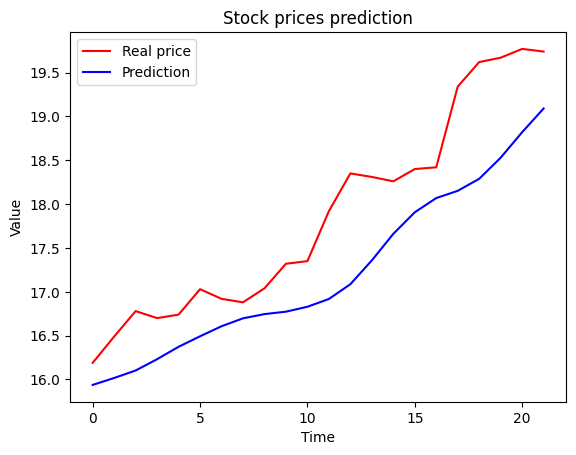

In [48]:
plt.plot(y_test, color='red', label='Real price')
plt.plot(predictions, color='blue', label='Prediction')
plt.title('Stock prices prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend();